#Loading Data

In [1]:
import pandas as pd

In [2]:
file_path = "/content/drive/MyDrive/KaggleV2-May-2016.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [6]:
df.columns.tolist()

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.shape

(110527, 14)

#Data Preprocessing

##Handling Null Values

In [10]:
import numpy as np

In [11]:
def null_search(df):
  na_cols=df.columns[df.isna().any()].tolist()
  null_values=pd.DataFrame(df[na_cols].isna().sum(), columns=['Number'])
  null_values['Percentage']=np.round(100*null_values['Number']/len(df),2)
  print(null_values)
  print(df.isnull().any())


In [12]:
null_search(df)

Empty DataFrame
Columns: [Number, Percentage]
Index: []
PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool


In [13]:
null_df = df.copy(deep=True)

In [14]:
def split_DT(column_list,prefix):
  D = []
  T = []
  for i in column_list:
   temp_d , temp_t = i.split("T")
   D.append(temp_d)
   T.append(temp_t)
  print("The list of scheduled dates : " , D)
  print("The list of scheduled time :" , T)
  null_df[str(prefix) +'_Date'] = D
  null_df[str(prefix) +'_Time'] = T



In [15]:
Sch_DT = null_df['ScheduledDay'].values.tolist()

In [16]:
split_DT(Sch_DT,'Sch')

The list of scheduled dates :  ['2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-27', '2016-04-27', '2016-04-27', '2016-04-29', '2016-04-27', '2016-04-27', '2016-04-26', '2016-04-28', '2016-04-28', '2016-04-28', '2016-04-26', '2016-04-28', '2016-04-28', '2016-04-26', '2016-04-29', '2016-04-27', '2016-04-27', '2016-04-25', '2016-04-28', '2016-04-29', '2016-04-26', '2016-04-29', '2016-04-27', '2016-04-29', '2016-04-29', '2016-04-27', '2016-04-27', '2016-04-29', '2016-04-25', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-20', '2016-04-29', '2016-04-28', '2016-04-28', '2016-04-28', '2016-04-29', '2016-04-28', '2016-04-28', '2016-04-25', '2016-04-28', '2016-04-26', '2016-03-31', '2016-03-31', '2016-03-31', '2016-03-31', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-19', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-27', '2016-04-27', '2016-04-25', '2016-04-27', '2016-04-25', '2016-04-27', '2016-04-29', '2016-04-29', '2016-04-06', '2

In [17]:
null_df = null_df.drop(['ScheduledDay'],axis=1)

In [18]:
null_df.tail(3)

PatientId  AppointmentID Gender        AppointmentDay  Age  \
110524  1.557663e+13        5630692      F  2016-06-07T00:00:00Z   21   
110525  9.213493e+13        5630323      F  2016-06-07T00:00:00Z   38   
110526  3.775115e+14        5629448      F  2016-06-07T00:00:00Z   54   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
110524   MARIA ORTIZ            0             0         0           0   
110525   MARIA ORTIZ            0             0         0           0   
110526   MARIA ORTIZ            0             0         0           0   

        Handcap  SMS_received No-show    Sch_Date   Sch_Time  
110524        0             1      No  2016-04-27  16:03:52Z  
110525        0             1      No  2016-04-27  15:09:23Z  
110526        0             1      No  2016-04-27  13:30:56Z

In [19]:
null_search(null_df)

Empty DataFrame
Columns: [Number, Percentage]
Index: []
PatientId         False
AppointmentID     False
Gender            False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
Sch_Date          False
Sch_Time          False
dtype: bool


In [20]:
App_DT = null_df['AppointmentDay'].values.tolist()

In [21]:
split_DT(App_DT,'App')

The list of scheduled dates :  ['2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2016-04-29', '2

In [22]:
null_df = null_df.drop(['AppointmentDay'],axis=1)

In [23]:
null_df.head(3)

PatientId  AppointmentID Gender  Age    Neighbourhood  Scholarship  \
0  2.987250e+13        5642903      F   62  JARDIM DA PENHA            0   
1  5.589978e+14        5642503      M   56  JARDIM DA PENHA            0   
2  4.262962e+12        5642549      F   62    MATA DA PRAIA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
0             1         0           0        0             0      No   
1             0         0           0        0             0      No   
2             0         0           0        0             0      No   

     Sch_Date   Sch_Time    App_Date   App_Time  
0  2016-04-29  18:38:08Z  2016-04-29  00:00:00Z  
1  2016-04-29  16:08:27Z  2016-04-29  00:00:00Z  
2  2016-04-29  16:19:04Z  2016-04-29  00:00:00Z

In [24]:
null_search(null_df)

Empty DataFrame
Columns: [Number, Percentage]
Index: []
PatientId        False
AppointmentID    False
Gender           False
Age              False
Neighbourhood    False
Scholarship      False
Hipertension     False
Diabetes         False
Alcoholism       False
Handcap          False
SMS_received     False
No-show          False
Sch_Date         False
Sch_Time         False
App_Date         False
App_Time         False
dtype: bool


In [25]:
null_df['App_Time'].nunique()

1

In [26]:
null_df[['App_Time','App_Date','Sch_Date','Sch_Time']].nunique()

App_Time        1
App_Date       27
Sch_Date      111
Sch_Time    37109
dtype: int64

In [27]:
print(null_df['Age'].min() , null_df['Age'].max())

-1 115


In [28]:
null_df['Age'].unique().tolist()

[62,
 56,
 8,
 76,
 23,
 39,
 21,
 19,
 30,
 29,
 22,
 28,
 54,
 15,
 50,
 40,
 46,
 4,
 13,
 65,
 45,
 51,
 32,
 12,
 61,
 38,
 79,
 18,
 63,
 64,
 85,
 59,
 55,
 71,
 49,
 78,
 31,
 58,
 27,
 6,
 2,
 11,
 7,
 0,
 3,
 1,
 69,
 68,
 60,
 67,
 36,
 10,
 35,
 20,
 26,
 34,
 33,
 16,
 42,
 5,
 47,
 17,
 41,
 44,
 37,
 24,
 66,
 77,
 81,
 70,
 53,
 75,
 73,
 52,
 74,
 43,
 89,
 57,
 14,
 9,
 48,
 83,
 72,
 25,
 80,
 87,
 88,
 84,
 82,
 90,
 94,
 86,
 91,
 98,
 92,
 96,
 93,
 95,
 97,
 102,
 115,
 100,
 99,
 -1]

In [29]:
filtered_df = null_df[(null_df['Age'] == -1) | (null_df['Age'] == 0)]
filtered_df

PatientId  AppointmentID Gender  Age      Neighbourhood  \
59      7.184428e+13        5638545      F    0          CONQUISTA   
63      2.366233e+14        5628286      M    0       SÃO BENEDITO   
64      1.885174e+14        5616082      M    0  ILHA DAS CAIEIRAS   
65      2.718818e+14        5628321      M    0          CONQUISTA   
67      8.647128e+13        5639264      F    0     NOVA PALESTINA   
...              ...            ...    ...  ...                ...   
110345  1.473952e+14        5702537      F    0        RESISTÊNCIA   
110346  5.577525e+12        5777724      M    0        RESISTÊNCIA   
110454  6.142460e+11        5772400      F    0        RESISTÊNCIA   
110460  4.321846e+13        5769545      F    0        RESISTÊNCIA   
110507  4.769462e+14        5786918      F    0        MARIA ORTIZ   

        Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
59                0             0         0           0        0   
63                0             0         0           0        0   
64                0             0         0           0        0   
65                0             0         0           0        0   
67                0             0         0           0        0   
...             ...           ...       ...         ...      ...   
110345            0             0         0           0        0   
110346            0             0         0           0        0   
110454            0             0         0           0        0   
110460            0             0         0           0        0   
110507            0             0         0           0        0   

        SMS_received No-show    Sch_Date   Sch_Time    App_Date   App_Time  
59                 0      No  2016-04-29  08:08:43Z  2016-04-29  00:00:00Z  
63                 0      No  2016-04-27  10:46:12Z  2016-04-29  00:00:00Z  
64                 1      No  2016-04-25  13:28:21Z  2016-04-29  00:00:00Z  
65                 0      No  2016-04-27  10:48:50Z  2016-04-29  00:00:00Z  
67                 0      No  2016-04-29  08:53:02Z  2016-04-29  00:00:00Z  
...              ...     ...         ...        ...         ...        ...  
110345             0      No  2016-05-16  12:30:58Z  2016-06-01  00:00:00Z  
110346             0      No  2016-06-06  14:22:34Z  2016-06-08  00:00:00Z  
110454             0      No  2016-06-03  15:18:44Z  2016-06-03  00:00:00Z  
110460             0      No  2016-06-03  08:56:51Z  2016-06-03  00:00:00Z  
110507             0      No  2016-06-08  09:04:18Z  2016-06-08  00:00:00Z  

[3540 rows x 16 columns]

In [30]:
mean_of_age = null_df[null_df['Age'].isin([-1, 0]) == False]['Age'].mean()
print("The mean of all meaningful ages is:" , mean_of_age)
rounded_mean = round(mean_of_age)
null_df['Age'] = null_df['Age'].replace({-1: rounded_mean, 0: rounded_mean})

The mean of all meaningful ages is: 38.31608513183845


In [31]:
filtered_df2 = null_df[(null_df['Age'] == -1) | (null_df['Age'] == 0)]
filtered_df2

Empty DataFrame
Columns: [PatientId, AppointmentID, Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show, Sch_Date, Sch_Time, App_Date, App_Time]
Index: []

##Imbalance Class(Visualization)

In [32]:
import matplotlib.pyplot as plt

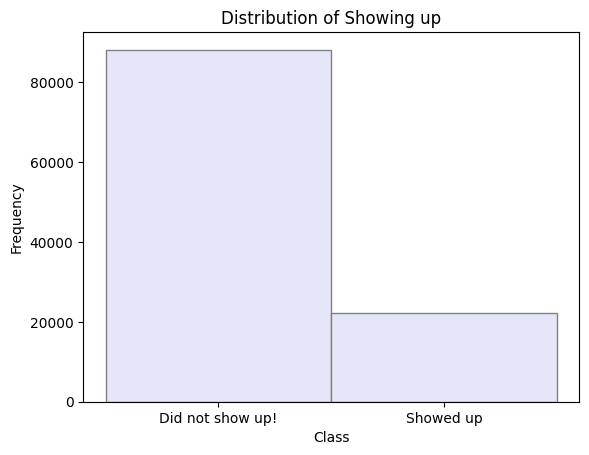

In [33]:
plt.hist(null_df['No-show'], bins=[-0.5,0.5,1.5] ,color='lavender', edgecolor='grey')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of Showing up")
plt.xticks([0, 1], ["Did not show up!", "Showed up"])
plt.show()

In [34]:
def show_dist(column , color_number):

 plt.hist(null_df[column], bins=[-0.5,0.5,1.5] ,color=colors[color_number], edgecolor='black')
 plt.xlabel("Class")
 plt.ylabel("Frequency")
 plt.title("Distribution of " + str(column))
 plt.xticks([0, 1], ["0", "1"])
 plt.show()

In [35]:
bool_cols = [col for col in null_df if np.isin(null_df[col].dropna().unique(), [0, 1]).all()]
print(bool_cols)

['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']


In [36]:
colors = ['lightblue', 'pink' , 'violet' ,'orange', 'yellow']

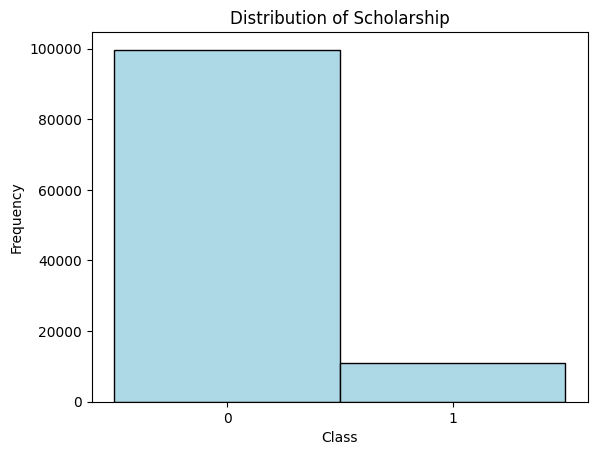

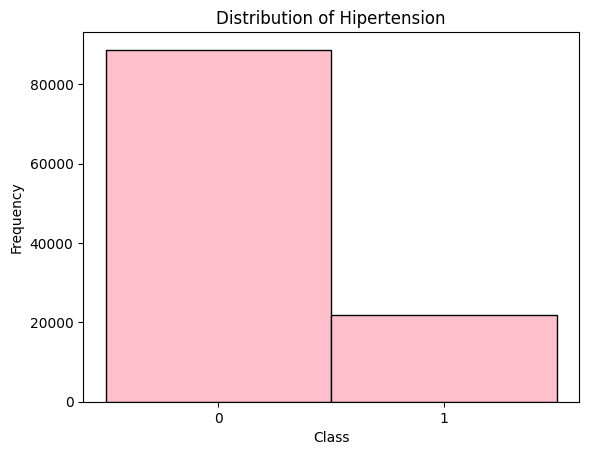

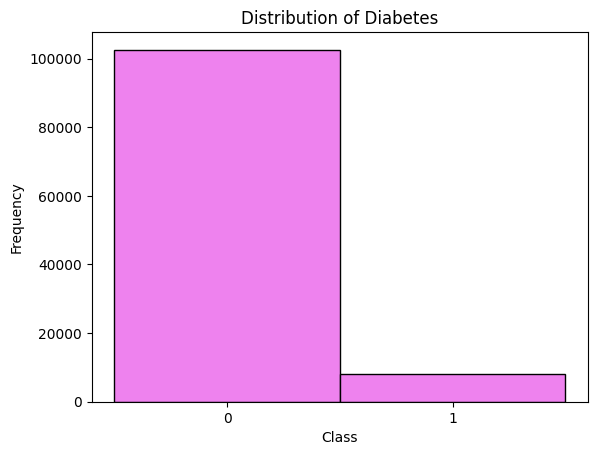

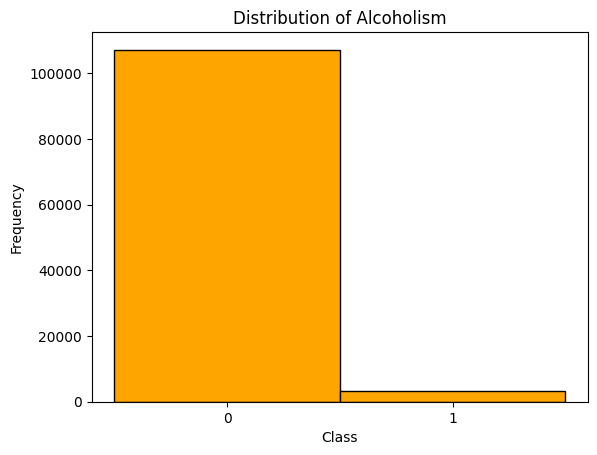

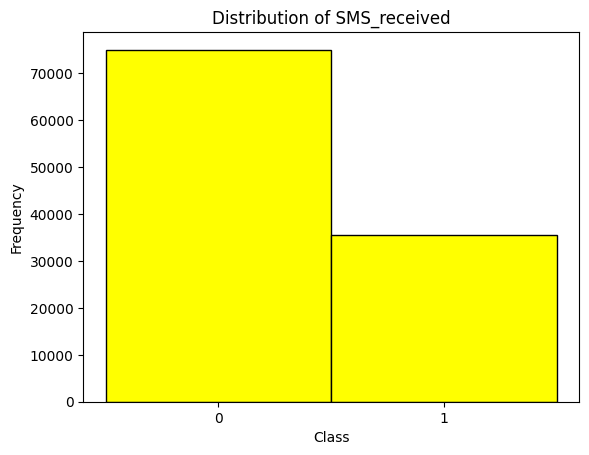

In [37]:
count = 0
for i in bool_cols:
  show_dist(i,count)
  count = count + 1

##Sample

In [39]:
sam_df = null_df.copy(deep=True)

In [43]:
df_minor = sam_df[sam_df['No-show'] == 'Yes']  # Minority class (class B)

In [44]:
df_minor

PatientId  AppointmentID Gender  Age   Neighbourhood  Scholarship  \
6       7.336882e+14        5630279      F   23      GOIABEIRAS            0   
7       3.449833e+12        5630575      F   39      GOIABEIRAS            0   
11      7.542951e+12        5620163      M   29  NOVA PALESTINA            0   
17      1.479497e+13        5633460      F   40       CONQUISTA            1   
20      6.222575e+14        5626083      F   30  NOVA PALESTINA            0   
...              ...            ...    ...  ...             ...          ...   
110484  5.133650e+14        5772155      F   45  BARRO VERMELHO            0   
110492  6.456342e+14        5786741      M   33     MARIA ORTIZ            0   
110496  8.544295e+13        5779046      F   37     MARIA ORTIZ            0   
110515  6.456342e+14        5778621      M   33     MARIA ORTIZ            0   
110516  6.923772e+13        5780205      F   37     MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
6                  0         0           0        0             0     Yes   
7                  0         0           0        0             0     Yes   
11                 0         0           0        0             1     Yes   
17                 0         0           0        0             0     Yes   
20                 0         0           0        0             0     Yes   
...              ...       ...         ...      ...           ...     ...   
110484             0         0           0        0             0     Yes   
110492             1         0           0        0             0     Yes   
110496             1         0           0        0             0     Yes   
110515             1         0           0        0             0     Yes   
110516             0         0           0        0             0     Yes   

          Sch_Date   Sch_Time    App_Date   App_Time  
6       2016-04-27  15:05:12Z  2016-04-29  00:00:00Z  
7       2016-04-27  15:39:58Z  2016-04-29  00:00:00Z  
11      2016-04-26  08:44:12Z  2016-04-29  00:00:00Z  
17      2016-04-28  09:28:57Z  2016-04-29  00:00:00Z  
20      2016-04-27  07:51:14Z  2016-04-29  00:00:00Z  
...            ...        ...         ...        ...  
110484  2016-06-03  14:43:56Z  2016-06-07  00:00:00Z  
110492  2016-06-08  08:50:19Z  2016-06-08  00:00:00Z  
110496  2016-06-06  17:35:38Z  2016-06-08  00:00:00Z  
110515  2016-06-06  15:58:05Z  2016-06-08  00:00:00Z  
110516  2016-06-07  07:45:16Z  2016-06-08  00:00:00Z  

[22319 rows x 16 columns]

In [45]:
df_minor.shape

(22319, 16)

(88208, 16)

In [236]:
from sklearn.utils import resample
df_major = sam_df[sam_df['No-show'] == 'No']
df_minor_sample = resample(df_major, replace=True, n_samples=44104, random_state=42)
df_minor_sample

PatientId  AppointmentID Gender  Age      Neighbourhood  \
19786  8.922632e+12        5637801      M    4         BELA VISTA   
1040   9.961612e+13        5561514      F    4             CENTRO   
96360  4.391631e+10        5676934      F   17    JARDIM DA PENHA   
69612  3.491915e+11        5670313      F   71     BARRO VERMELHO   
7910   3.959642e+14        5728970      M   38  JESUS DE NAZARETH   
...             ...            ...    ...  ...                ...   
85143  7.316169e+14        5714169      F   60    JARDIM DA PENHA   
72326  9.749728e+12        5697835      F   44          CARATOÍRA   
78432  3.125979e+14        5669261      M   56        SANTA LUÍZA   
59856  3.442386e+12        5563104      F   48        JUCUTUQUARA   
1145   5.853129e+11        5623706      F   38         ANDORINHAS   

       Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
19786            0             0         0           0        0             1   
1040             0             0         0           0        0             1   
96360            0             0         0           0        0             1   
69612            0             0         1           0        0             0   
7910             0             0         0           0        0             0   
...            ...           ...       ...         ...      ...           ...   
85143            0             0         0           0        0             1   
72326            0             1         0           0        0             0   
78432            0             0         0           0        0             1   
59856            0             0         0           0        0             1   
1145             0             0         0           0        0             0   

      No-show    Sch_Date   Sch_Time    App_Date   App_Time  
19786      No  2016-04-29  07:24:14Z  2016-05-31  00:00:00Z  
1040       No  2016-04-08  10:45:52Z  2016-04-29  00:00:00Z  
96360      No  2016-05-09  16:54:35Z  2016-06-07  00:00:00Z  
69612      No  2016-05-06  13:34:49Z  2016-05-06  00:00:00Z  
7910       No  2016-05-24  07:04:24Z  2016-05-24  00:00:00Z  
...       ...         ...        ...         ...        ...  
85143      No  2016-05-18  11:23:13Z  2016-06-07  00:00:00Z  
72326      No  2016-05-14  11:01:38Z  2016-05-14  00:00:00Z  
78432      No  2016-05-06  10:35:55Z  2016-05-12  00:00:00Z  
59856      No  2016-04-08  15:08:34Z  2016-05-12  00:00:00Z  
1145       No  2016-04-26  14:30:10Z  2016-04-29  00:00:00Z  

[44104 rows x 16 columns]

In [239]:
df_sample = pd.concat([df_minor_sample ,df_minor])

In [240]:
df_sample

PatientId  AppointmentID Gender  Age      Neighbourhood  \
19786   8.922632e+12        5637801      M    4         BELA VISTA   
1040    9.961612e+13        5561514      F    4             CENTRO   
96360   4.391631e+10        5676934      F   17    JARDIM DA PENHA   
69612   3.491915e+11        5670313      F   71     BARRO VERMELHO   
7910    3.959642e+14        5728970      M   38  JESUS DE NAZARETH   
...              ...            ...    ...  ...                ...   
110484  5.133650e+14        5772155      F   45     BARRO VERMELHO   
110492  6.456342e+14        5786741      M   33        MARIA ORTIZ   
110496  8.544295e+13        5779046      F   37        MARIA ORTIZ   
110515  6.456342e+14        5778621      M   33        MARIA ORTIZ   
110516  6.923772e+13        5780205      F   37        MARIA ORTIZ   

        Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
19786             0             0         0           0        0   
1040              0             0         0           0        0   
96360             0             0         0           0        0   
69612             0             0         1           0        0   
7910              0             0         0           0        0   
...             ...           ...       ...         ...      ...   
110484            0             0         0           0        0   
110492            0             1         0           0        0   
110496            0             1         0           0        0   
110515            0             1         0           0        0   
110516            0             0         0           0        0   

        SMS_received No-show    Sch_Date   Sch_Time    App_Date   App_Time  
19786              1      No  2016-04-29  07:24:14Z  2016-05-31  00:00:00Z  
1040               1      No  2016-04-08  10:45:52Z  2016-04-29  00:00:00Z  
96360              1      No  2016-05-09  16:54:35Z  2016-06-07  00:00:00Z  
69612              0      No  2016-05-06  13:34:49Z  2016-05-06  00:00:00Z  
7910               0      No  2016-05-24  07:04:24Z  2016-05-24  00:00:00Z  
...              ...     ...         ...        ...         ...        ...  
110484             0     Yes  2016-06-03  14:43:56Z  2016-06-07  00:00:00Z  
110492             0     Yes  2016-06-08  08:50:19Z  2016-06-08  00:00:00Z  
110496             0     Yes  2016-06-06  17:35:38Z  2016-06-08  00:00:00Z  
110515             0     Yes  2016-06-06  15:58:05Z  2016-06-08  00:00:00Z  
110516             0     Yes  2016-06-07  07:45:16Z  2016-06-08  00:00:00Z  

[66423 rows x 16 columns]

##Encoding Categorical columns

In [241]:
encode_df = df_sample.copy(deep=True)

In [242]:
encode_df.tail(2)

PatientId  AppointmentID Gender  Age Neighbourhood  Scholarship  \
110515  6.456342e+14        5778621      M   33   MARIA ORTIZ            0   
110516  6.923772e+13        5780205      F   37   MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  \
110515             1         0           0        0             0     Yes   
110516             0         0           0        0             0     Yes   

          Sch_Date   Sch_Time    App_Date   App_Time  
110515  2016-06-06  15:58:05Z  2016-06-08  00:00:00Z  
110516  2016-06-07  07:45:16Z  2016-06-08  00:00:00Z

###convert to binary

In [243]:
#covert "no-show" into binary form
encode_df['No-show'].replace({'Yes': 1, 'No': 0}, inplace=True)
encode_df.head(4)

PatientId  AppointmentID Gender  Age    Neighbourhood  Scholarship  \
19786  8.922632e+12        5637801      M    4       BELA VISTA            0   
1040   9.961612e+13        5561514      F    4           CENTRO            0   
96360  4.391631e+10        5676934      F   17  JARDIM DA PENHA            0   
69612  3.491915e+11        5670313      F   71   BARRO VERMELHO            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
19786             0         0           0        0             1        0   
1040              0         0           0        0             1        0   
96360             0         0           0        0             1        0   
69612             0         1           0        0             0        0   

         Sch_Date   Sch_Time    App_Date   App_Time  
19786  2016-04-29  07:24:14Z  2016-05-31  00:00:00Z  
1040   2016-04-08  10:45:52Z  2016-04-29  00:00:00Z  
96360  2016-05-09  16:54:35Z  2016-06-07  00:00:00Z  
69612  2016-05-06  13:34:49Z  2016-05-06  00:00:00Z

In [244]:
#convert gender into binary form
encode_df['Gender'].replace({'F': 1, 'M': 0}, inplace=True)
encode_df.head(4)

PatientId  AppointmentID  Gender  Age    Neighbourhood  Scholarship  \
19786  8.922632e+12        5637801       0    4       BELA VISTA            0   
1040   9.961612e+13        5561514       1    4           CENTRO            0   
96360  4.391631e+10        5676934       1   17  JARDIM DA PENHA            0   
69612  3.491915e+11        5670313       1   71   BARRO VERMELHO            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
19786             0         0           0        0             1        0   
1040              0         0           0        0             1        0   
96360             0         0           0        0             1        0   
69612             0         1           0        0             0        0   

         Sch_Date   Sch_Time    App_Date   App_Time  
19786  2016-04-29  07:24:14Z  2016-05-31  00:00:00Z  
1040   2016-04-08  10:45:52Z  2016-04-29  00:00:00Z  
96360  2016-05-09  16:54:35Z  2016-06-07  00:00:00Z  
69612  2016-05-06  13:34:49Z  2016-05-06  00:00:00Z

###Combining Features

In [245]:
import datetime
def get_month(column):
  month = []
  for date_str in encode_df[str(column)]:
    date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d")
    month.append(date_obj.month)
  print(set(month))

In [246]:
get_month('Sch_Date')

{1, 2, 3, 4, 5, 6, 11, 12}


In [247]:
value_counts_series = encode_df['Sch_Date'].value_counts()
value_counts_dict = value_counts_series.to_dict()
print(value_counts_series)
print(value_counts_dict)

Sch_Date
2016-05-03    2569
2016-05-02    2492
2016-05-16    2480
2016-05-05    2433
2016-04-29    2371
              ... 
2016-01-05       1
2015-12-03       1
2016-01-04       1
2016-01-21       1
2016-01-26       1
Name: count, Length: 104, dtype: int64
{'2016-05-03': 2569, '2016-05-02': 2492, '2016-05-16': 2480, '2016-05-05': 2433, '2016-04-29': 2371, '2016-05-10': 2360, '2016-05-09': 2307, '2016-05-04': 2131, '2016-05-11': 2116, '2016-05-06': 2096, '2016-05-18': 2019, '2016-05-17': 2005, '2016-05-30': 1986, '2016-05-12': 1945, '2016-05-24': 1864, '2016-05-13': 1864, '2016-05-19': 1851, '2016-05-20': 1779, '2016-04-28': 1766, '2016-05-25': 1685, '2016-04-26': 1626, '2016-05-31': 1624, '2016-06-01': 1589, '2016-04-27': 1539, '2016-06-02': 1524, '2016-06-03': 1416, '2016-04-25': 1387, '2016-06-06': 1313, '2016-04-20': 1256, '2016-04-18': 968, '2016-04-15': 951, '2016-06-07': 943, '2016-04-19': 830, '2016-06-08': 813, '2016-04-13': 498, '2016-04-14': 490, '2016-04-11': 454, '2016-04-0

In [248]:
import statistics
median_value = statistics.median(value_counts_series)
print(median_value)

113.0


In [249]:
unique_once_count = (value_counts_series < 6 ).sum()
print(unique_once_count)

23


In [250]:
print(encode_df.shape)
encode_df = encode_df[encode_df['Sch_Date'].isin(value_counts_series[value_counts_series > 5].index)]
print(encode_df.shape)

(66423, 16)
(66372, 16)


In [251]:
encode_df['Sch_Date'].unique()

array(['2016-04-29', '2016-04-08', '2016-05-09', '2016-05-06',
       '2016-05-24', '2016-06-08', '2016-05-03', '2016-05-31',
       '2016-05-12', '2016-05-20', '2016-04-25', '2016-05-30',
       '2016-05-25', '2016-05-13', '2016-05-16', '2016-06-06',
       '2016-05-02', '2016-06-01', '2016-05-05', '2016-05-04',
       '2016-04-26', '2016-04-28', '2016-05-17', '2016-06-03',
       '2016-03-31', '2016-05-10', '2016-04-01', '2016-05-19',
       '2016-06-02', '2016-06-07', '2016-05-18', '2016-03-02',
       '2016-05-11', '2016-04-18', '2016-04-13', '2016-04-11',
       '2016-04-05', '2016-04-07', '2016-03-17', '2016-04-27',
       '2016-04-20', '2016-04-15', '2016-04-12', '2016-03-15',
       '2016-04-19', '2016-04-06', '2016-03-30', '2016-01-07',
       '2016-03-07', '2016-03-22', '2016-03-23', '2016-04-14',
       '2016-03-29', '2016-03-16', '2016-02-19', '2016-03-03',
       '2016-05-14', '2016-03-01', '2016-03-09', '2016-03-10',
       '2016-03-14', '2016-03-18', '2016-03-28', '2016-

In [252]:
get_month('Sch_Date')

{1, 2, 3, 4, 5, 6, 12}


In [253]:
encode_df.head()

PatientId  AppointmentID  Gender  Age      Neighbourhood  \
19786  8.922632e+12        5637801       0    4         BELA VISTA   
1040   9.961612e+13        5561514       1    4             CENTRO   
96360  4.391631e+10        5676934       1   17    JARDIM DA PENHA   
69612  3.491915e+11        5670313       1   71     BARRO VERMELHO   
7910   3.959642e+14        5728970       0   38  JESUS DE NAZARETH   

       Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
19786            0             0         0           0        0             1   
1040             0             0         0           0        0             1   
96360            0             0         0           0        0             1   
69612            0             0         1           0        0             0   
7910             0             0         0           0        0             0   

       No-show    Sch_Date   Sch_Time    App_Date   App_Time  
19786        0  2016-04-29  07:24:14Z  2016-05-31  00:00:00Z  
1040         0  2016-04-08  10:45:52Z  2016-04-29  00:00:00Z  
96360        0  2016-05-09  16:54:35Z  2016-06-07  00:00:00Z  
69612        0  2016-05-06  13:34:49Z  2016-05-06  00:00:00Z  
7910         0  2016-05-24  07:04:24Z  2016-05-24  00:00:00Z

In [254]:
encode_df['Month'] = pd.to_datetime(encode_df['Sch_Date']).dt.month
encode_df.tail()

PatientId  AppointmentID  Gender  Age   Neighbourhood  Scholarship  \
110484  5.133650e+14        5772155       1   45  BARRO VERMELHO            0   
110492  6.456342e+14        5786741       0   33     MARIA ORTIZ            0   
110496  8.544295e+13        5779046       1   37     MARIA ORTIZ            0   
110515  6.456342e+14        5778621       0   33     MARIA ORTIZ            0   
110516  6.923772e+13        5780205       1   37     MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
110484             0         0           0        0             0        1   
110492             1         0           0        0             0        1   
110496             1         0           0        0             0        1   
110515             1         0           0        0             0        1   
110516             0         0           0        0             0        1   

          Sch_Date   Sch_Time    App_Date   App_Time  Month  
110484  2016-06-03  14:43:56Z  2016-06-07  00:00:00Z      6  
110492  2016-06-08  08:50:19Z  2016-06-08  00:00:00Z      6  
110496  2016-06-06  17:35:38Z  2016-06-08  00:00:00Z      6  
110515  2016-06-06  15:58:05Z  2016-06-08  00:00:00Z      6  
110516  2016-06-07  07:45:16Z  2016-06-08  00:00:00Z      6

In [255]:
encode_df['App_Date'].unique()

array(['2016-05-31', '2016-04-29', '2016-06-07', '2016-05-06',
       '2016-05-24', '2016-06-08', '2016-05-03', '2016-06-02',
       '2016-05-12', '2016-05-30', '2016-05-05', '2016-06-06',
       '2016-05-13', '2016-05-25', '2016-05-10', '2016-05-16',
       '2016-06-01', '2016-05-17', '2016-05-20', '2016-05-04',
       '2016-06-03', '2016-05-02', '2016-05-18', '2016-05-19',
       '2016-05-09', '2016-05-11', '2016-05-14'], dtype=object)

In [256]:
encode_df['Month-App'] = pd.to_datetime(encode_df['App_Date']).dt.month

In [257]:
#extract time from timestamp
hour = []
for time in encode_df['Sch_Time']:
 parsed_time = datetime.datetime.strptime(time, "%H:%M:%S%z")
 hour.append(parsed_time.hour)
encode_df['hour'] = hour

In [258]:
encode_df.tail(8)

PatientId  AppointmentID  Gender  Age   Neighbourhood  Scholarship  \
110470  4.125933e+12        5692391       1   26     RESISTÊNCIA            0   
110479  4.455244e+12        5638153       1   34     RESISTÊNCIA            1   
110482  5.944225e+14        5639147       1   43     RESISTÊNCIA            1   
110484  5.133650e+14        5772155       1   45  BARRO VERMELHO            0   
110492  6.456342e+14        5786741       0   33     MARIA ORTIZ            0   
110496  8.544295e+13        5779046       1   37     MARIA ORTIZ            0   
110515  6.456342e+14        5778621       0   33     MARIA ORTIZ            0   
110516  6.923772e+13        5780205       1   37     MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
110470             0         0           0        0             1        1   
110479             0         0           0        0             1        1   
110482             0         0           0        0             1        1   
110484             0         0           0        0             0        1   
110492             1         0           0        0             0        1   
110496             1         0           0        0             0        1   
110515             1         0           0        0             0        1   
110516             0         0           0        0             0        1   

          Sch_Date   Sch_Time    App_Date   App_Time  Month  Month-App  hour  
110470  2016-05-12  15:12:01Z  2016-06-02  00:00:00Z      5          6    15  
110479  2016-04-29  07:45:43Z  2016-06-06  00:00:00Z      4          6     7  
110482  2016-04-29  08:45:44Z  2016-06-06  00:00:00Z      4          6     8  
110484  2016-06-03  14:43:56Z  2016-06-07  00:00:00Z      6          6    14  
110492  2016-06-08  08:50:19Z  2016-06-08  00:00:00Z      6          6     8  
110496  2016-06-06  17:35:38Z  2016-06-08  00:00:00Z      6          6    17  
110515  2016-06-06  15:58:05Z  2016-06-08  00:00:00Z      6          6    15  
110516  2016-06-07  07:45:16Z  2016-06-08  00:00:00Z      6          6     7

In [259]:
#combine scheduled month and hour to get a new feature
encode_df['Month+Hour'] = pd.concat([encode_df['Month'].astype(str), encode_df['hour'].astype(str)], axis=1).apply(''.join, axis=1)
encode_df.head()

PatientId  AppointmentID  Gender  Age      Neighbourhood  \
19786  8.922632e+12        5637801       0    4         BELA VISTA   
1040   9.961612e+13        5561514       1    4             CENTRO   
96360  4.391631e+10        5676934       1   17    JARDIM DA PENHA   
69612  3.491915e+11        5670313       1   71     BARRO VERMELHO   
7910   3.959642e+14        5728970       0   38  JESUS DE NAZARETH   

       Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
19786            0             0         0           0        0             1   
1040             0             0         0           0        0             1   
96360            0             0         0           0        0             1   
69612            0             0         1           0        0             0   
7910             0             0         0           0        0             0   

       No-show    Sch_Date   Sch_Time    App_Date   App_Time  Month  \
19786        0  2016-04-29  07:24:14Z  2016-05-31  00:00:00Z      4   
1040         0  2016-04-08  10:45:52Z  2016-04-29  00:00:00Z      4   
96360        0  2016-05-09  16:54:35Z  2016-06-07  00:00:00Z      5   
69612        0  2016-05-06  13:34:49Z  2016-05-06  00:00:00Z      5   
7910         0  2016-05-24  07:04:24Z  2016-05-24  00:00:00Z      5   

       Month-App  hour Month+Hour  
19786          5     7         47  
1040           4    10        410  
96360          6    16        516  
69612          5    13        513  
7910           5     7         57

In [260]:
encode_df['Month+Hour'].nunique()

82

In [261]:
encode_df = encode_df.drop(['Month','hour','Month-App'],axis=1)

In [262]:
encode_df.tail()

PatientId  AppointmentID  Gender  Age   Neighbourhood  Scholarship  \
110484  5.133650e+14        5772155       1   45  BARRO VERMELHO            0   
110492  6.456342e+14        5786741       0   33     MARIA ORTIZ            0   
110496  8.544295e+13        5779046       1   37     MARIA ORTIZ            0   
110515  6.456342e+14        5778621       0   33     MARIA ORTIZ            0   
110516  6.923772e+13        5780205       1   37     MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  \
110484             0         0           0        0             0        1   
110492             1         0           0        0             0        1   
110496             1         0           0        0             0        1   
110515             1         0           0        0             0        1   
110516             0         0           0        0             0        1   

          Sch_Date   Sch_Time    App_Date   App_Time Month+Hour  
110484  2016-06-03  14:43:56Z  2016-06-07  00:00:00Z        614  
110492  2016-06-08  08:50:19Z  2016-06-08  00:00:00Z         68  
110496  2016-06-06  17:35:38Z  2016-06-08  00:00:00Z        617  
110515  2016-06-06  15:58:05Z  2016-06-08  00:00:00Z        615  
110516  2016-06-07  07:45:16Z  2016-06-08  00:00:00Z         67

In [263]:
encode_df.nunique()

PatientId        39475
AppointmentID    56899
Gender               2
Age                101
Neighbourhood       80
Scholarship          2
Hipertension         2
Diabetes             2
Alcoholism           2
Handcap              5
SMS_received         2
No-show              2
Sch_Date            81
Sch_Time         29183
App_Date            27
App_Time             1
Month+Hour          82
dtype: int64

###One-Hot Encoding

In [264]:
final_onehot = ['App_Date','Neighbourhood','Sch_Date']

In [265]:
encoded_df = pd.get_dummies(encode_df, columns=final_onehot,dtype=int)

In [266]:
encoded_df.tail()

PatientId  AppointmentID  Gender  Age  Scholarship  Hipertension  \
110484  5.133650e+14        5772155       1   45            0             0   
110492  6.456342e+14        5786741       0   33            0             1   
110496  8.544295e+13        5779046       1   37            0             1   
110515  6.456342e+14        5778621       0   33            0             1   
110516  6.923772e+13        5780205       1   37            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received  ...  Sch_Date_2016-05-24  \
110484         0           0        0             0  ...                    0   
110492         0           0        0             0  ...                    0   
110496         0           0        0             0  ...                    0   
110515         0           0        0             0  ...                    0   
110516         0           0        0             0  ...                    0   

       Sch_Date_2016-05-25 Sch_Date_2016-05-30 Sch_Date_2016-05-31  \
110484                   0                   0                   0   
110492                   0                   0                   0   
110496                   0                   0                   0   
110515                   0                   0                   0   
110516                   0                   0                   0   

        Sch_Date_2016-06-01  Sch_Date_2016-06-02  Sch_Date_2016-06-03  \
110484                    0                    0                    1   
110492                    0                    0                    0   
110496                    0                    0                    0   
110515                    0                    0                    0   
110516                    0                    0                    0   

        Sch_Date_2016-06-06  Sch_Date_2016-06-07  Sch_Date_2016-06-08  
110484                    0                    0                    0  
110492                    0                    0                    1  
110496                    1                    0                    0  
110515                    1                    0                    0  
110516                    0                    1                    0  

[5 rows x 202 columns]

In [267]:
encoded_df = encoded_df.drop(['Sch_Time','App_Time',],axis=1)

##Scale

In [268]:
scaled_df = encoded_df.copy(deep=True)

In [269]:
# choose the columns to scale
# the columns that are numerical not the encoded columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df[['Age', 'Month+Hour']])
scaled_df[['Age','Month+Hour']] = scaled_features
scaled_df.head()

PatientId  AppointmentID  Gender       Age  Scholarship  \
19786  8.922632e+12        5637801       0 -1.534812            0   
1040   9.961612e+13        5561514       1 -1.534812            0   
96360  4.391631e+10        5676934       1 -0.943837            0   
69612  3.491915e+11        5670313       1  1.510982            0   
7910   3.959642e+14        5728970       0  0.010815            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  ...  \
19786             0         0           0        0             1  ...   
1040              0         0           0        0             1  ...   
96360             0         0           0        0             1  ...   
69612             0         1           0        0             0  ...   
7910              0         0           0        0             0  ...   

       Sch_Date_2016-05-24  Sch_Date_2016-05-25  Sch_Date_2016-05-30  \
19786                    0                    0                    0   
1040                     0                    0                    0   
96360                    0                    0                    0   
69612                    0                    0                    0   
7910                     1                    0                    0   

       Sch_Date_2016-05-31  Sch_Date_2016-06-01  Sch_Date_2016-06-02  \
19786                    0                    0                    0   
1040                     0                    0                    0   
96360                    0                    0                    0   
69612                    0                    0                    0   
7910                     0                    0                    0   

       Sch_Date_2016-06-03  Sch_Date_2016-06-06  Sch_Date_2016-06-07  \
19786                    0                    0                    0   
1040                     0                    0                    0   
96360                    0                    0                    0   
69612                    0                    0                    0   
7910                     0                    0                    0   

       Sch_Date_2016-06-08  
19786                    0  
1040                     0  
96360                    0  
69612                    0  
7910                     0  

[5 rows x 200 columns]

In [270]:
scaled_df = scaled_df.drop(['PatientId','AppointmentID'],axis=1)

In [271]:
scaled_df.columns.tolist()

['Gender',
 'Age',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'Month+Hour',
 'App_Date_2016-04-29',
 'App_Date_2016-05-02',
 'App_Date_2016-05-03',
 'App_Date_2016-05-04',
 'App_Date_2016-05-05',
 'App_Date_2016-05-06',
 'App_Date_2016-05-09',
 'App_Date_2016-05-10',
 'App_Date_2016-05-11',
 'App_Date_2016-05-12',
 'App_Date_2016-05-13',
 'App_Date_2016-05-14',
 'App_Date_2016-05-16',
 'App_Date_2016-05-17',
 'App_Date_2016-05-18',
 'App_Date_2016-05-19',
 'App_Date_2016-05-20',
 'App_Date_2016-05-24',
 'App_Date_2016-05-25',
 'App_Date_2016-05-30',
 'App_Date_2016-05-31',
 'App_Date_2016-06-01',
 'App_Date_2016-06-02',
 'App_Date_2016-06-03',
 'App_Date_2016-06-06',
 'App_Date_2016-06-07',
 'App_Date_2016-06-08',
 'Neighbourhood_AEROPORTO',
 'Neighbourhood_ANDORINHAS',
 'Neighbourhood_ANTÔNIO HONÓRIO',
 'Neighbourhood_ARIOVALDO FAVALESSA',
 'Neighbourhood_BARRO VERMELHO',
 'Neighbourhood_BELA VISTA',
 'Neighbourhood_BENTO FER

In [272]:
target = scaled_df.pop('No-show')

In [273]:
scaled_df.insert(len(scaled_df.columns),'No-show',target)

In [274]:
scaled_df

Gender       Age  Scholarship  Hipertension  Diabetes  Alcoholism  \
19786        0 -1.534812            0             0         0           0   
1040         1 -1.534812            0             0         0           0   
96360        1 -0.943837            0             0         0           0   
69612        1  1.510982            0             0         1           0   
7910         0  0.010815            0             0         0           0   
...        ...       ...          ...           ...       ...         ...   
110484       1  0.329032            0             0         0           0   
110492       0 -0.216483            0             1         0           0   
110496       1 -0.034645            0             1         0           0   
110515       0 -0.216483            0             1         0           0   
110516       1 -0.034645            0             0         0           0   

        Handcap  SMS_received  Month+Hour  App_Date_2016-04-29  ...  \
19786         0             1   -1.143232                    0  ...   
1040          0             1    0.498854                    1  ...   
96360         0             1    0.978361                    0  ...   
69612         0             0    0.964790                    0  ...   
7910          0             0   -1.097996                    0  ...   
...         ...           ...         ...                  ...  ...   
110484        0             0    1.421679                    0  ...   
110492        0             0   -1.048236                    0  ...   
110496        0             0    1.435250                    0  ...   
110515        0             0    1.426203                    0  ...   
110516        0             0   -1.052759                    0  ...   

        Sch_Date_2016-05-25  Sch_Date_2016-05-30  Sch_Date_2016-05-31  \
19786                     0                    0                    0   
1040                      0                    0                    0   
96360                     0                    0                    0   
69612                     0                    0                    0   
7910                      0                    0                    0   
...                     ...                  ...                  ...   
110484                    0                    0                    0   
110492                    0                    0                    0   
110496                    0                    0                    0   
110515                    0                    0                    0   
110516                    0                    0                    0   

        Sch_Date_2016-06-01  Sch_Date_2016-06-02  Sch_Date_2016-06-03  \
19786                     0                    0                    0   
1040                      0                    0                    0   
96360                     0                    0                    0   
69612                     0                    0                    0   
7910                      0                    0                    0   
...                     ...                  ...                  ...   
110484                    0                    0                    1   
110492                    0                    0                    0   
110496                    0                    0                    0   
110515                    0                    0                    0   
110516                    0                    0                    0   

        Sch_Date_2016-06-06  Sch_Date_2016-06-07  Sch_Date_2016-06-08  No-show  
19786                     0                    0                    0        0  
1040                      0                    0                    0        0  
96360                     0                    0                    0        0  
69612                     0                    0                    0        0  
7910                      0                    0                    0  

#Training

In [146]:
#import all of the needed libraries and tools
from numpy import vstack
from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, average_precision_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.optim import lr_scheduler
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import copy
import math

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [275]:
test_df = scaled_df.copy(deep=True)

In [276]:
test_df.head()

Gender       Age  Scholarship  Hipertension  Diabetes  Alcoholism  \
19786       0 -1.534812            0             0         0           0   
1040        1 -1.534812            0             0         0           0   
96360       1 -0.943837            0             0         0           0   
69612       1  1.510982            0             0         1           0   
7910        0  0.010815            0             0         0           0   

       Handcap  SMS_received  Month+Hour  App_Date_2016-04-29  ...  \
19786        0             1   -1.143232                    0  ...   
1040         0             1    0.498854                    1  ...   
96360        0             1    0.978361                    0  ...   
69612        0             0    0.964790                    0  ...   
7910         0             0   -1.097996                    0  ...   

       Sch_Date_2016-05-25  Sch_Date_2016-05-30  Sch_Date_2016-05-31  \
19786                    0                    0                    0   
1040                     0                    0                    0   
96360                    0                    0                    0   
69612                    0                    0                    0   
7910                     0                    0                    0   

       Sch_Date_2016-06-01  Sch_Date_2016-06-02  Sch_Date_2016-06-03  \
19786                    0                    0                    0   
1040                     0                    0                    0   
96360                    0                    0                    0   
69612                    0                    0                    0   
7910                     0                    0                    0   

       Sch_Date_2016-06-06  Sch_Date_2016-06-07  Sch_Date_2016-06-08  No-show  
19786                    0                    0                    0        0  
1040                     0                    0                    0        0  
96360                    0                    0                    0        0  
69612                    0                    0                    0        0  
7910                     0                    0                    0        0  

[5 rows x 198 columns]

In [277]:
test_df['No-show'].unique()

array([0, 1])

In [278]:
#we save the changed file into csv form
filename = 'Showup.csv'
test_df.to_csv('/content/drive/MyDrive/' + filename)

In [279]:
#we remove the header row from our data frame
final_df = pd.read_csv('/content/drive/MyDrive/Showup.csv', skiprows=1)

In [280]:
del final_df[final_df.columns[0]]

In [281]:
final_df.to_csv('/content/drive/MyDrive/Showup.csv')

In [282]:
num_of_cols = len(final_df.columns)
num_of_cols

198

In [283]:
final_df

0  -1.534812286764103  0.1  0.2  0.3  0.4  0.5  1  -1.1432323944555112  \
0      1           -1.534812    0    0    0    0    0  1             0.498854   
1      1           -0.943837    0    0    0    0    0  1             0.978361   
2      1            1.510982    0    0    1    0    0  0             0.964790   
3      0            0.010815    0    0    0    0    0  0            -1.097996   
4      0           -1.625732    0    0    0    0    0  0             1.421679   
...   ..                 ...  ...  ...  ...  ...  ... ..                  ...   
66366  1            0.329032    0    0    0    0    0  0             1.421679   
66367  0           -0.216483    0    1    0    0    0  0            -1.048236   
66368  1           -0.034645    0    1    0    0    0  0             1.435250   
66369  0           -0.216483    0    1    0    0    0  0             1.426203   
66370  1           -0.034645    0    0    0    0    0  0            -1.052759   

       0.6  ...  0.182  0.183  0.184  0.185  0.186  0.187  0.188  0.189  \
0        1  ...      0      0      0      0      0      0      0      0   
1        0  ...      0      0      0      0      0      0      0      0   
2        0  ...      0      0      0      0      0      0      0      0   
3        0  ...      0      0      0      0      0      0      0      0   
4        0  ...      0      0      0      0      0      0      0      0   
...    ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
66366    0  ...      0      0      0      0      0      1      0      0   
66367    0  ...      0      0      0      0      0      0      0      0   
66368    0  ...      0      0      0      0      0      0      1      0   
66369    0  ...      0      0      0      0      0      0      1      0   
66370    0  ...      0      0      0      0      0      0      0      1   

       0.190  0.191  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          1      0  
...      ...    ...  
66366      0      1  
66367      1      1  
66368      0      1  
66369      0      1  
66370      0      1  

[66371 rows x 198 columns]

In [284]:
#define a class for do all of the needed conversions on our dataframe to get it ready for training
class preprocess(Dataset):
    #read the data frame
    def __init__(self,path):
        df = read_csv(path, header=None)
        #delete the first column of our data frame which is the index column and we don't need it
        del df[df.columns[0]]
        self.X = df.values[:, :-1]
        #take the last column as the target which is 'No-show' feature
        self.y = df.values[:, -1]
        #convert x and y into understandable tensors
        self.X = self.X.astype('float32')
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # Get the number of rows in the dataset
    def __len__(self):
        return len(self.X)
    # Get a row at an index
    def __getitem__(self,idx):
        return [self.X[idx], self.y[idx]]

    # define a method for splitting our data into test and train sets with the given ratio
    def split_data(self, split_ratio=0.2):
        test_size = round(split_ratio * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])

In [285]:
def train_preparation(path):
    dataset = preprocess(path)
    train, test = dataset.split_data(split_ratio=0.1)
    # use dataloaders to use our data in batch form
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [286]:
train, test = train_preparation('/content/drive/MyDrive/Showup.csv')

In [287]:
class mlp_arch(Module):
    def __init__(self, n_inputs):
        super(mlp_arch, self).__init__()
        #we define the architecture of our mlp model with three layers
        #First
        self.hidden1 = Linear(n_inputs, 20)
        #activation function for the first and second  layer is relu
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        #Second
        self.hidden2 = Linear(20, 10)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        #Third
        #since our task is binary classification, we use sigmoid for the last layer's activation function
        self.hidden3 = Linear(10,1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()
    #define the method for forward pass
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        return X

In [288]:
# Specify the number of input dimensions
model = mlp_arch(num_of_col - 1)

In [289]:
#we need some lists for collecting the loss and accuracy during training in each epoch
#so later we can see the trendline of each of them
epoch_loss_list = []
epoch_acc_list = []
epoch_list = []
def train_process(train_dl, model, epochs=50, lr=0.01, momentum=0.9, save_path='DATASET.pth'):
    #choose our loss function and optimizer for reducing loss
    #in this case we use BCE loss and sgd for optimizer
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=lr, momentum=momentum)
    loss = 0.0
    #now we iterate for the given number of epochs
    for epoch in range(epochs):
        print('Epoch {} out of {}'.format(epoch+1, epochs))
        # print('*' * 10)
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        # Iterate through training data
        for i, (inputs, targets) in enumerate(train_dl):
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs.data,1) #Get the class labels
            loss = criterion(outputs, targets)
            #backpropagation
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            total += targets.size(0)
            correct += (preds == targets).sum().item()
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        #add the loss and accuracy and also the number of current epoch to the related lists
        epoch_loss_list.append(epoch_loss)
        epoch_acc_list.append(epoch_acc)
        epoch_list.append(epoch + 1)
        #print the loss and accuracy for the current epoch
        print('Loss: {:.4f} Accuracy: {:.4f}'.format(epoch_loss, epoch_acc))
        print('*' * 10)
        #save in the given path
        torch.save(model, save_path)

    return model

In [290]:
train_process(train, model, save_path='/content/drive/MyDrive/DATASET.pth', epochs=50,lr=0.01)

Epoch 1 out of 50
Loss: 0.6135 Accuracy: 21.2680
**********
Epoch 2 out of 50
Loss: 0.5876 Accuracy: 21.2678
**********
Epoch 3 out of 50
Loss: 0.5733 Accuracy: 21.2681
**********
Epoch 4 out of 50
Loss: 0.5636 Accuracy: 21.2678
**********
Epoch 5 out of 50
Loss: 0.5590 Accuracy: 21.2675
**********
Epoch 6 out of 50
Loss: 0.5541 Accuracy: 21.2674
**********
Epoch 7 out of 50
Loss: 0.5517 Accuracy: 21.2674
**********
Epoch 8 out of 50
Loss: 0.5492 Accuracy: 21.2677
**********
Epoch 9 out of 50
Loss: 0.5476 Accuracy: 21.2678
**********
Epoch 10 out of 50
Loss: 0.5457 Accuracy: 21.2672
**********
Epoch 11 out of 50
Loss: 0.5434 Accuracy: 21.2680
**********
Epoch 12 out of 50
Loss: 0.5417 Accuracy: 21.2674
**********
Epoch 13 out of 50
Loss: 0.5400 Accuracy: 21.2675
**********
Epoch 14 out of 50
Loss: 0.5387 Accuracy: 21.2678
**********
Epoch 15 out of 50
Loss: 0.5372 Accuracy: 21.2674
**********
Epoch 16 out of 50
Loss: 0.5358 Accuracy: 21.2678
**********
Epoch 17 out of 50
Loss: 0.5340 A

mlp_arch(
  (hidden1): Linear(in_features=197, out_features=20, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=20, out_features=10, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=10, out_features=1, bias=True)
  (act3): Sigmoid()
)

#Evaluation

In [291]:
def evaluation(test, model):
    y_preds = []
    y_acts = []
# now we apply our model on the test data to get the predicted target and compare it with the true target values for
#this set of data, this will give us a good insight of our model's performance
    for (i, (inputs, targets)) in enumerate(test):
        #predict y with our model
        y_predicted = model(inputs)
        y_predicted = y_predicted.detach().numpy()
        y_true = targets.numpy()
        y_true = y_true.reshape((len(y_true), 1))
        # Round to get the right value
        y_predicted = y_predicted.round()
        y_preds.append(y_predicted)
        y_acts.append(y_true)

    y_preds, y_acts = vstack(y_preds), vstack(y_acts)
    #Calculate the confusion matrix for getting metrics
    cm = confusion_matrix(y_acts, y_preds)
    tn, fp, fn, tp = cm.ravel()
    total = sum(cm.ravel())

    evaluations = {
        'Accuracy': accuracy_score(y_acts, y_preds),
        'F1 Score': f1_score(y_acts, y_preds),
        'Precision': precision_score(y_acts, y_preds),
        'Average Precision Score': average_precision_score(y_acts, y_preds),
        'Recall': recall_score(y_acts, y_preds),
        'True Positive Rate':recall_score(y_acts, y_preds),
        'False Positive Rate':fp / (fp + tn) ,
        'Misclassification Rate': (fp+fn)/total ,
        'Sensitivity': tp / (tp + fn),
        'Specificity': tn / (tn + fp),
    }
    return evaluations

In [292]:
results = evaluation(test, model)

In [293]:
result_df = pd.DataFrame.from_dict(results, orient='index', columns=['Metric'])
result_df.index.name = 'Evaluation Metric Type'
result_df.reset_index(inplace=True)
result_df.to_csv('evaluation_stds.csv', index=False)

In [294]:
result_df

Evaluation Metric Type    Metric
0                 Accuracy  0.691578
1                 F1 Score  0.418631
2                Precision  0.590072
3  Average Precision Score  0.422689
4                   Recall  0.324384
5       True Positive Rate  0.324384
6      False Positive Rate  0.117297
7   Misclassification Rate  0.308422
8              Sensitivity  0.324384
9              Specificity  0.882703

#Visualization

In [295]:
loss_acc = pd.DataFrame({'Epoch': epoch_list ,'Loss': epoch_loss_list, 'Accuracy': epoch_acc_list})
loss_acc

Epoch      Loss   Accuracy
0       1  0.613531  21.267984
1       2  0.587639  21.267833
2       3  0.573329  21.268134
3       4  0.563557  21.267833
4       5  0.558991  21.267532
5       6  0.554118  21.267381
6       7  0.551738  21.267381
7       8  0.549224  21.267682
8       9  0.547592  21.267833
9      10  0.545738  21.267230
10     11  0.543408  21.267984
11     12  0.541729  21.267381
12     13  0.539988  21.267532
13     14  0.538673  21.267833
14     15  0.537243  21.267381
15     16  0.535817  21.267833
16     17  0.534027  21.267682
17     18  0.533021  21.266778
18     19  0.531882  21.267381
19     20  0.530556  21.267532
20     21  0.530083  21.268134
21     22  0.528351  21.267682
22     23  0.527014  21.267381
23     24  0.526223  21.267532
24     25  0.525461  21.267532
25     26  0.524743  21.267682
26     27  0.523221  21.267682
27     28  0.522037  21.267682
28     29  0.521173  21.268436
29     30  0.520927  21.267381
30     31  0.518989  21.267833
31     32  0.518532  21.267984
32     33  0.517636  21.268134
33     34  0.517443  21.267833
34     35  0.516671  21.266929
35     36  0.515702  21.267682
36     37  0.515344  21.268285
37     38  0.514668  21.267682
38     39  0.513611  21.268134
39     40  0.513007  21.267833
40     41  0.512207  21.267682
41     42  0.511334  21.267984
42     43  0.511700  21.267682
43     44  0.510485  21.267682
44     45  0.510468  21.268285
45     46  0.508995  21.267532
46     47  0.509430  21.267080
47     48  0.508546  21.267682
48     49  0.508497  21.267080
49     50  0.507552  21.267230

In [296]:
import matplotlib.pyplot as plt
def get_trend(variable ,color):
 plt.figure(figsize=(8, 6))
 plt.plot(loss_acc['Epoch'], loss_acc[str(variable)], marker='o', color=str(color), label= str(variable) +' during epochs')
 plt.xlabel('Epoch')
 plt.ylabel(str(variable))
 plt.title( str(variable) +' during epochs')
 plt.grid(True)
 plt.show()

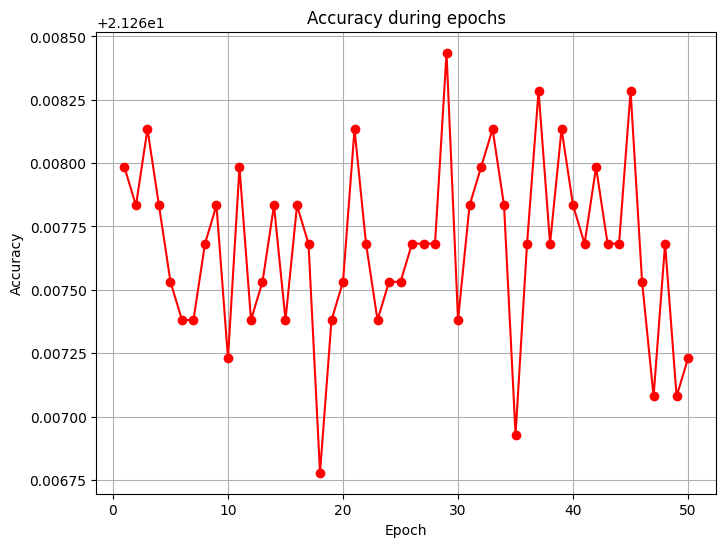

In [297]:
get_trend('Accuracy','r')

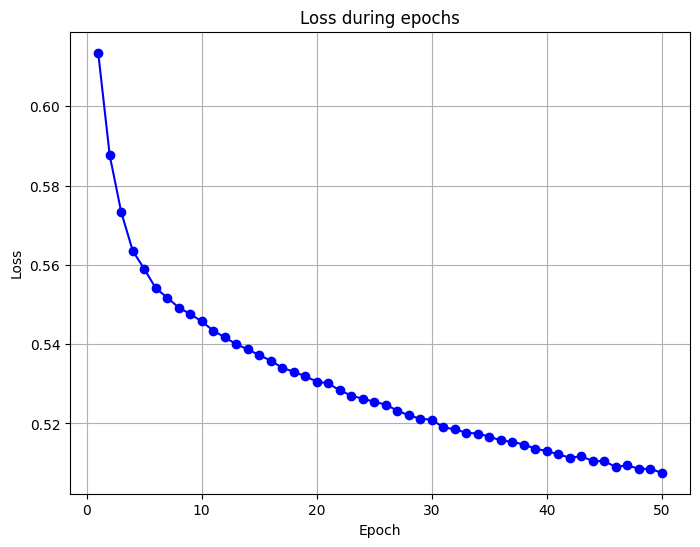

In [298]:
get_trend('Loss','b')